In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
data = pd.read_csv('C:/Users/Drew/Documents/Datasets/Consumer Electronics/GME_stock.csv')

In [3]:
data.set_index('date', inplace=True)

In [4]:
data.head(20)

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002
2021-01-21,39.230000,44.750000,37.000000,43.029999,57079800.0,43.029999
2021-01-20,37.369999,41.189999,36.060001,39.119999,33471800.0,39.119999
2021-01-19,41.549999,45.520000,36.639999,39.360001,74721900.0,39.360001
2021-01-15,38.490002,40.750000,34.009998,35.500000,46752200.0,35.500000


In [5]:
pd.to_datetime(data.index)

DatetimeIndex(['2021-01-28', '2021-01-27', '2021-01-26', '2021-01-25',
               '2021-01-22', '2021-01-21', '2021-01-20', '2021-01-19',
               '2021-01-15', '2021-01-14',
               ...
               '2002-02-27', '2002-02-26', '2002-02-25', '2002-02-22',
               '2002-02-21', '2002-02-20', '2002-02-19', '2002-02-15',
               '2002-02-14', '2002-02-13'],
              dtype='datetime64[ns]', name='date', length=4773, freq=None)

In [6]:
data = data.sort_values(by='date')

In [7]:
data.head()

,open_price,high_price,low_price,close_price,volume,adjclose_price
date,,,,,,
2002-02-13,9.625,10.060,9.525,10.050,19054000.0,6.766666
2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003
2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336
2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017
2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838


In [8]:
data.isnull().sum()

open_price        0
high_price        0
low_price         0
close_price       0
volume            0
adjclose_price    0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4773 entries, 2002-02-13 to 2021-01-28
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open_price      4773 non-null   float64
 1   high_price      4773 non-null   float64
 2   low_price       4773 non-null   float64
 3   close_price     4773 non-null   float64
 4   volume          4773 non-null   float64
 5   adjclose_price  4773 non-null   float64
dtypes: float64(6)
memory usage: 261.0+ KB


# Data Visualization

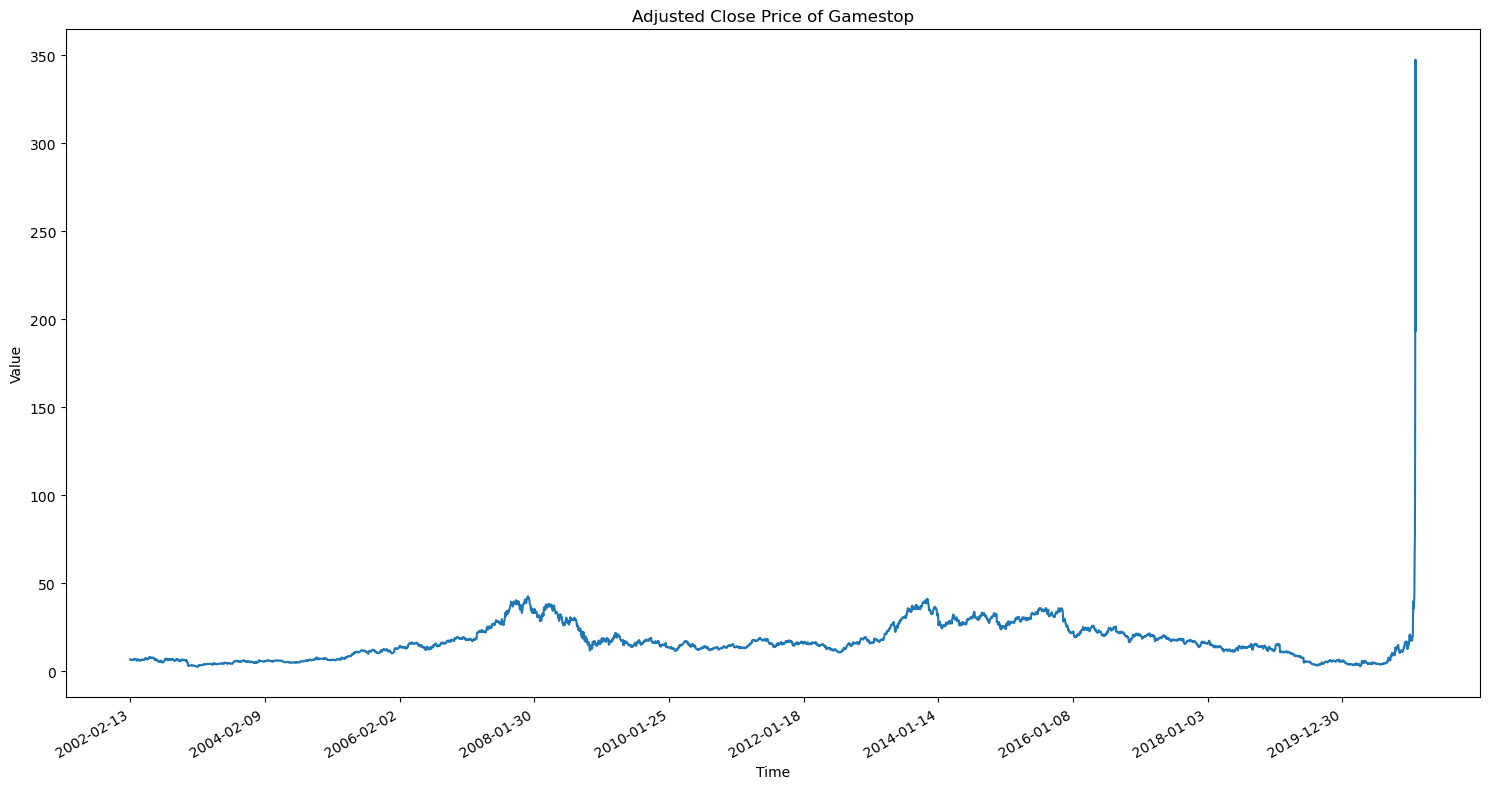

In [10]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['adjclose_price'], label='Adj Close')
ax.set_title('Adjusted Close Price of Gamestop')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,4773,500))
pt.tight_layout()

The stock seems to have low and stable volatility of adjusted closing price except towards to end there's a day where it suddenly spiked up significantly and falls back down the next day.

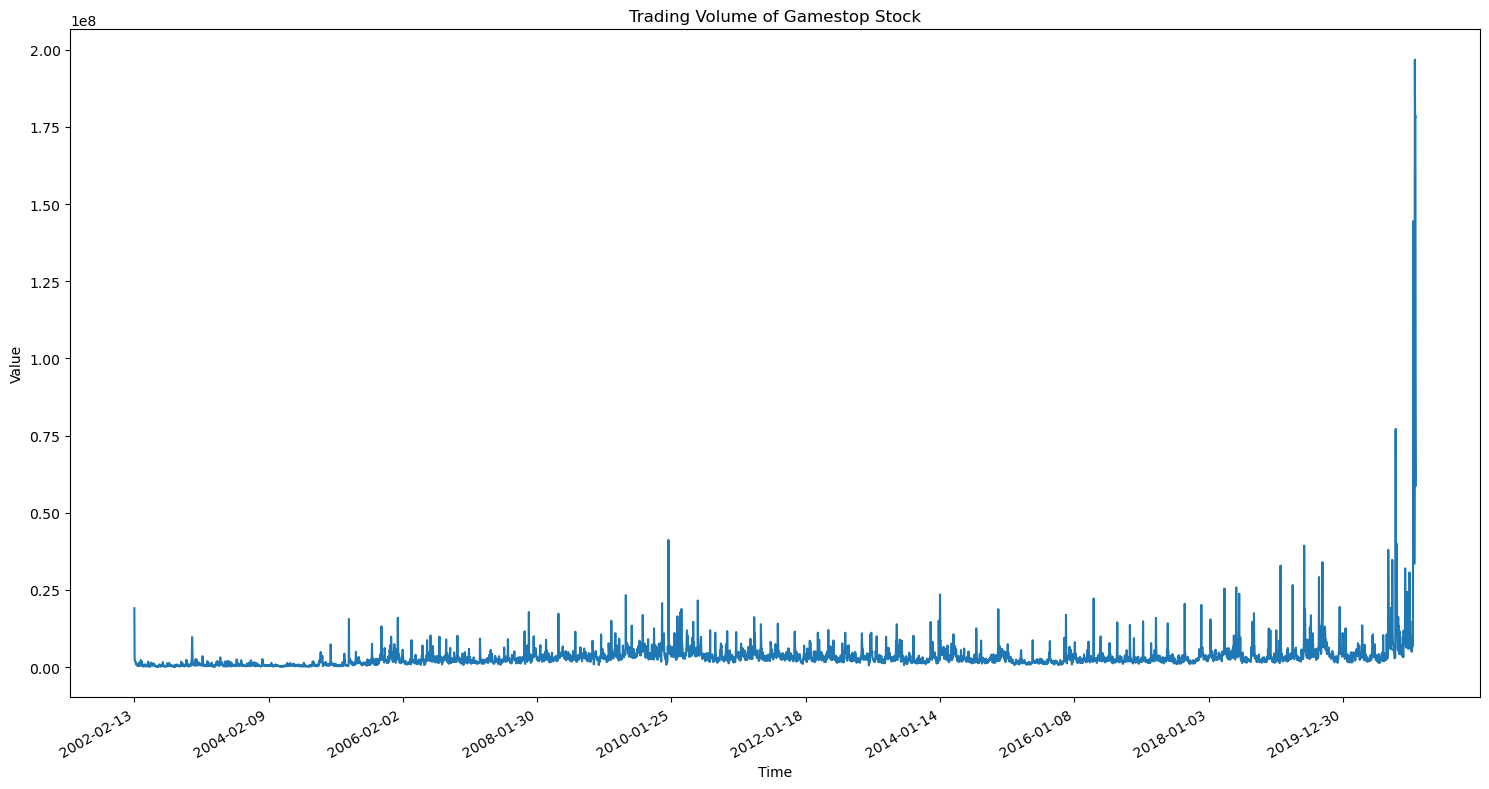

In [11]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(data['volume'], label='Volume')
ax.set_title('Trading Volume of Gamestop Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,4773,500))
pt.tight_layout()

It seems that year in recent years, 2021, there's a spike in volume. This might be due to Keith Gill influence on the Gamestop stock

https://www.cbsnews.com/news/keith-gill-gamestop-cbs-news-explains/

R-Value:  0.200413018525914
P-Value:  1.9412336883975202e-44
Std Err:  0.00011342974192531475


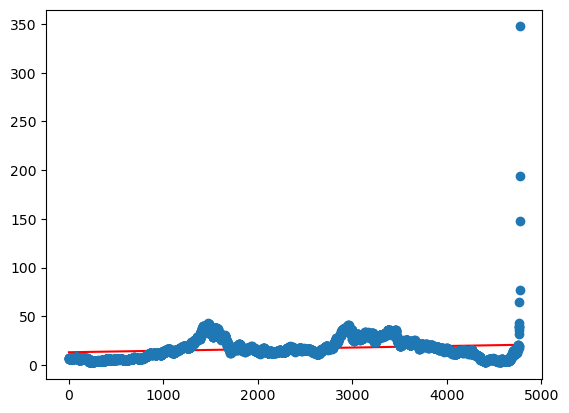

In [12]:
xi = np.arange(0,4773)
y = data['adjclose_price']

slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print('R-Value: ' , r_value)
print('P-Value: ' , p_value)
print('Std Err: ' , std_err)

line = slope*xi  + intercept
pt.plot(xi, line, 'r', xi, y, 'o')
pt.show()


The Gamestop stock has a very low presence of linearity with Adj Close Price. Let's see how the ARIMA model performs

In [13]:
std_dev = data['adjclose_price'].std()
print(f' Standard Deviation: {std_dev}')

mean = np.mean(data['adjclose_price'])
print(f' Mean: {mean}')

coef_var = (std_dev / mean)*100
print(f' Coefficient Variance: {coef_var} %')

 Standard Deviation: 11.019953149220532
 Mean: 16.882896867408807
 Coefficient Variance: 65.27288080811383 %


# Moving Average Window

In [14]:
data['Moving Average (10)'] = data['adjclose_price'].rolling(window=10).mean()
data['Moving Average (30)'] = data['adjclose_price'].rolling(window=30).mean()
data['Moving Average (50)'] = data['adjclose_price'].rolling(window=50).mean()
data['Moving Average (100)'] = data['adjclose_price'].rolling(window=100).mean()

In [15]:
data.head(20)

,open_price,high_price,low_price,close_price,volume,adjclose_price,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100)
date,,,,,,,,,,
2002-02-13,9.625,10.060,9.525,10.050,19054000.0,6.766666,NaN,NaN,NaN,NaN
2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003,NaN,NaN,NaN,NaN
2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336,NaN,NaN,NaN,NaN
2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017,NaN,NaN,NaN,NaN
2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838,NaN,NaN,NaN,NaN
2002-02-21,9.840,9.925,9.750,9.850,1744200.0,6.632006,NaN,NaN,NaN,NaN
2002-02-22,9.925,9.925,9.600,9.675,881400.0,6.514178,NaN,NaN,NaN,NaN
2002-02-25,9.650,9.825,9.540,9.750,863400.0,6.564678,NaN,NaN,NaN,NaN
2002-02-26,9.700,9.850,9.545,9.750,690400.0,6.564678,NaN,NaN,NaN,NaN


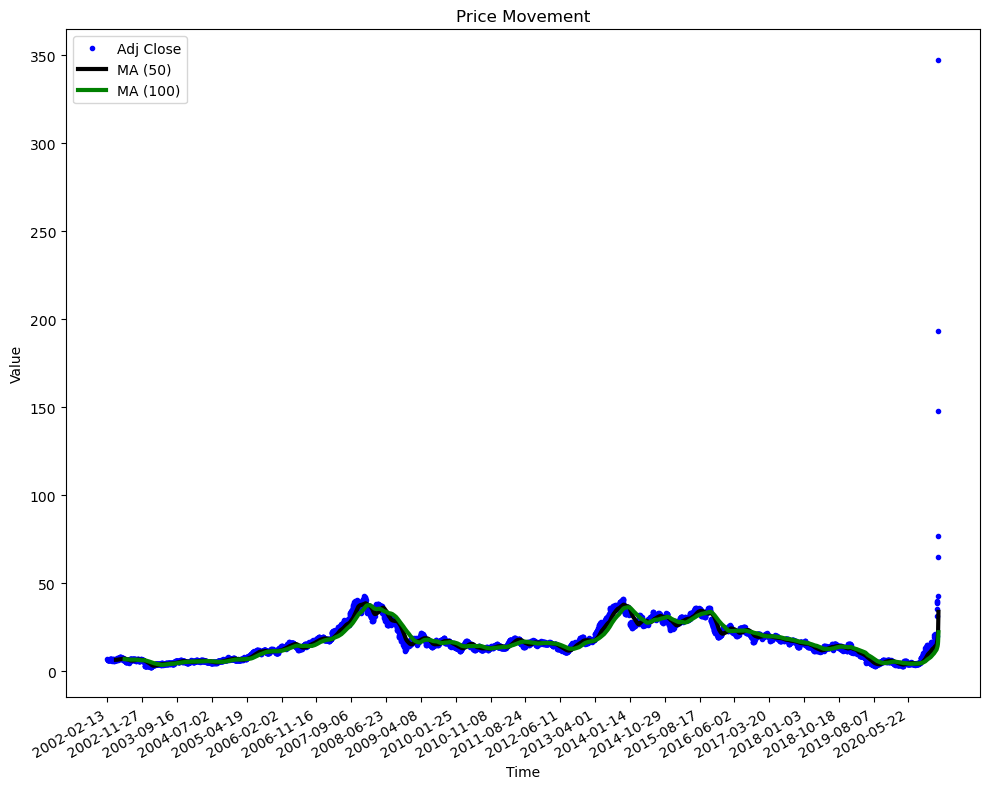

In [16]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['adjclose_price'], 'b.', label='Adj Close')
ax.plot(data['Moving Average (50)'], 'k-',label='MA (50)', linewidth=3)
ax.plot(data['Moving Average (100)'], 'g-',label='MA (100)', linewidth=3)
ax.set_title('Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,4773, 200))
fig.autofmt_xdate()
pt.tight_layout()

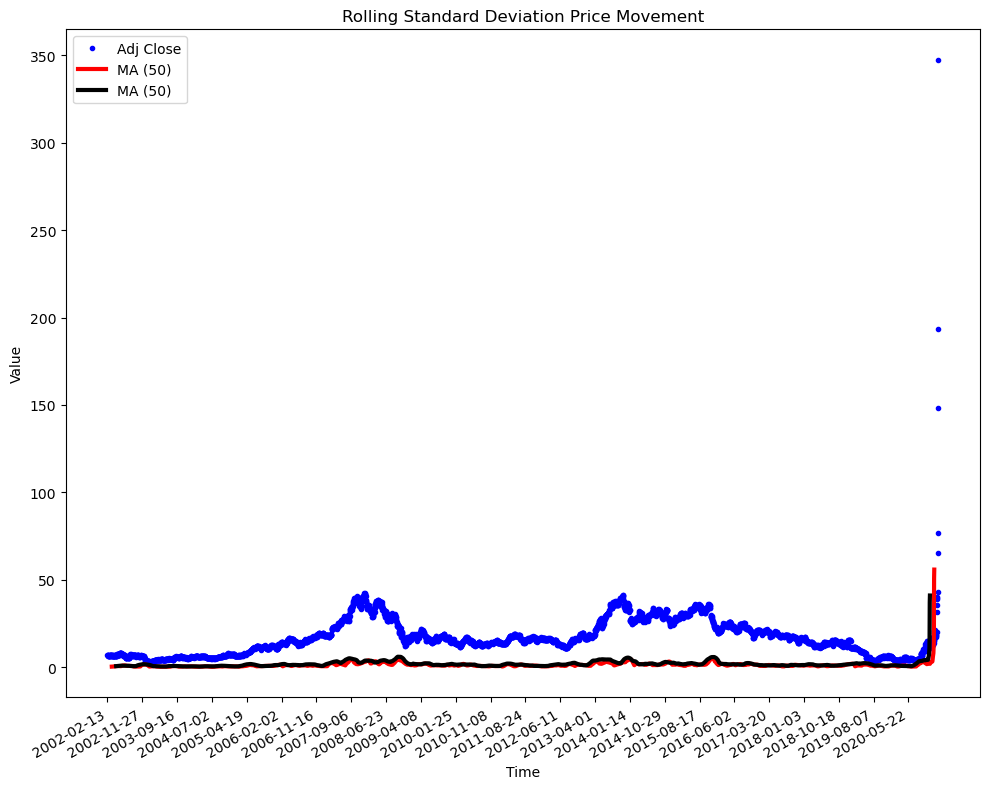

In [17]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['adjclose_price'], 'b.', label='Adj Close')
ax.plot(data['adjclose_price'].rolling(window=50, center=True).std(), 'r-', label='MA (50)', linewidth=3)
ax.plot(data['adjclose_price'].rolling(window=100, center=True).std(), 'k-',label='MA (50)', linewidth=3)
ax.set_title('Rolling Standard Deviation Price Movement')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,4773, 200))
fig.autofmt_xdate()
pt.tight_layout()

The standard deviation is fairly constant

pct_change() in this case is basically calculating the percentage change of the current element from previous element. In this case, Adj Close price the current day and the previous day. 

In [18]:
data['Daily Return'] = data['adjclose_price'].pct_change()
data.head()

,open_price,high_price,low_price,close_price,volume,adjclose_price,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100),Daily Return
date,,,,,,,,,,,
2002-02-13,9.625,10.060,9.525,10.050,19054000.0,6.766666,NaN,NaN,NaN,NaN,NaN
2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003,NaN,NaN,NaN,NaN,-0.004975
2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336,NaN,NaN,NaN,NaN,-0.005000
2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017,NaN,NaN,NaN,NaN,-0.040201
2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838,NaN,NaN,NaN,NaN,0.034031


In [19]:
data.tail()

,open_price,high_price,low_price,close_price,volume,adjclose_price,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100),Daily Return
date,,,,,,,,,,,
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,35.091000,22.937333,19.3438,14.8823,0.510807
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,41.001000,25.041667,20.6576,15.5834,0.181203
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,53.805000,29.503667,23.3822,16.9867,0.927074
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,86.561001,40.643667,30.1098,20.3847,1.348358
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,102.781001,46.673000,33.7616,22.2425,-0.442894


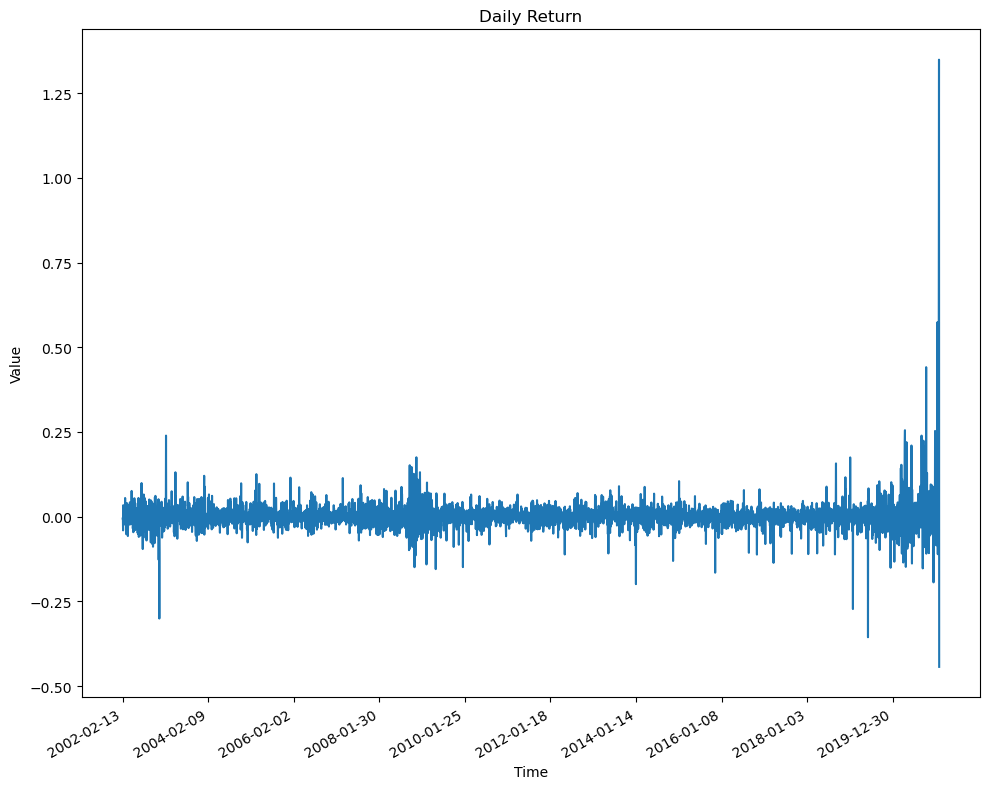

In [20]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['Daily Return'], label='Daily Return')
ax.set_title('Daily Return')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
pt.xticks(np.arange(0,4773,500))
fig.autofmt_xdate()
pt.tight_layout()

# XGBoosting For Feature Importance

In [21]:
Features = ['open_price', 'low_price', 'high_price', 'close_price', 'volume', 'Daily Return']
target = ['adjclose_price']

In [22]:
train = data.loc[data.index < '2020-1-28']
test = data.loc[data.index > '2020-1-28']

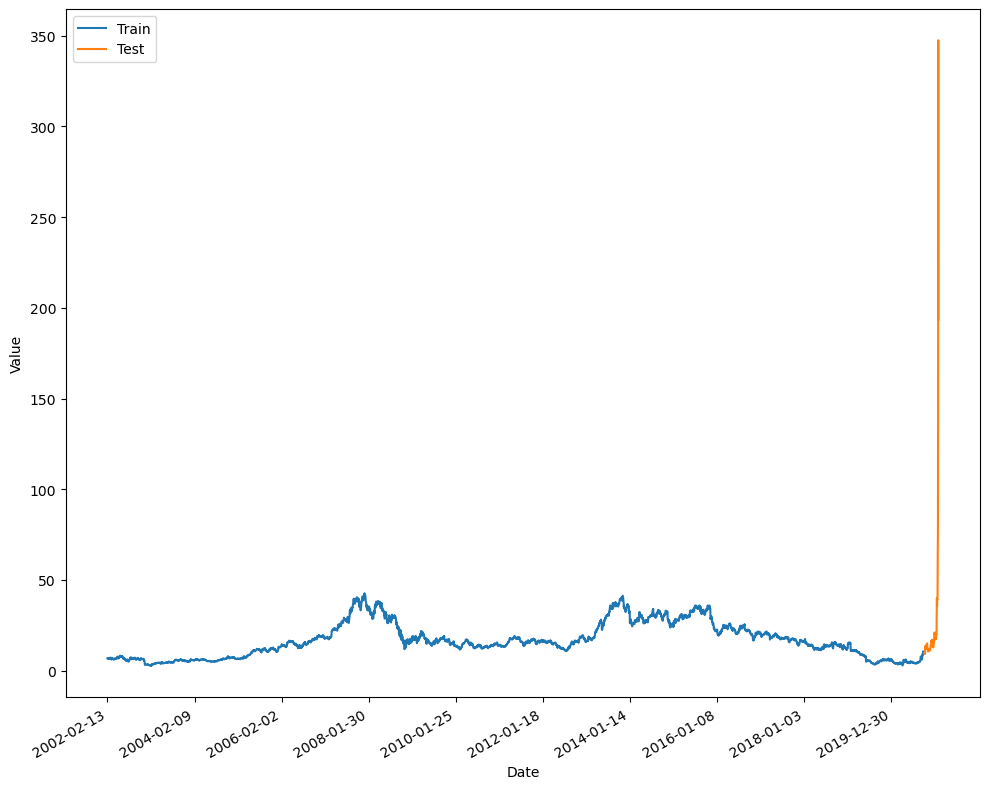

In [23]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(train[target], label='Train')
ax.plot(test[target], label='Test')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend(loc=2)
pt.xticks(np.arange(0,4773,500))
fig.autofmt_xdate()
pt.tight_layout()

In [24]:
X_train = train[Features]
y_train = train[target]

X_test = test[Features]
y_test = test[target]

In [25]:
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50, learning_rate=0.03)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:9.09499	validation_1-rmse:45.08759
[100]	validation_0-rmse:1.08292	validation_1-rmse:40.49488
[200]	validation_0-rmse:0.88727	validation_1-rmse:40.27817
[300]	validation_0-rmse:0.83263	validation_1-rmse:40.23485
[400]	validation_0-rmse:0.77534	validation_1-rmse:40.22191
[500]	validation_0-rmse:0.73106	validation_1-rmse:40.21102
[600]	validation_0-rmse:0.69534	validation_1-rmse:40.20599
[700]	validation_0-rmse:0.65803	validation_1-rmse:40.20077
[742]	validation_0-rmse:0.63920	validation_1-rmse:40.20215


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
feature_importance = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['Importances'])

<Axes: title={'center': 'Feature Importance'}>

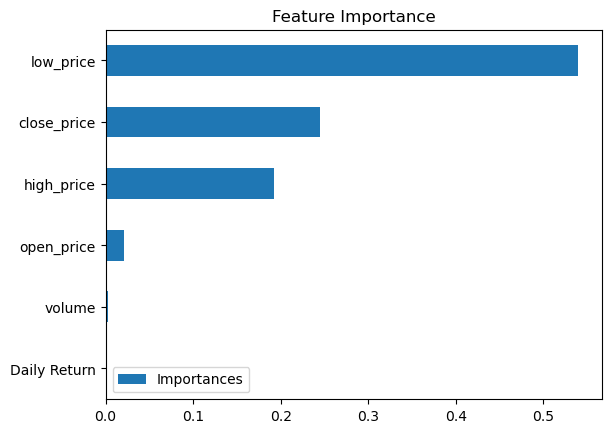

In [27]:
feature_importance.sort_values('Importances').plot(kind='barh', title='Feature Importance')

In [28]:
feature_importance

,Importances
open_price,0.020645
low_price,0.539488
high_price,0.192098
close_price,0.244362
volume,0.002389
Daily Return,0.001017


Only the lowest price of the day is relevant to our Adjusted Closing Price

# Stationary Check

In [29]:
adf_results = adfuller(data['adjclose_price'])
print(f' ADF Statistic: {adf_results[0]}')
print(f' P-Value: {adf_results[1]}')

 ADF Statistic: 0.9117347397332952
 P-Value: 0.99324157275546


In [30]:
adf_results = adfuller(np.diff(data['adjclose_price'], n=1))
print(f' ADF Statistic: {adf_results[0]}')

if adf_results[1] < 0.05:
    print(f' P-Value: {adf_results[1]}')
    print(' The time series is stationary')
else:
    print(f' P-Value: {adf_results[1]}')
    print('The Time Series is not stationary')

 ADF Statistic: 5.550585608456771
 P-Value: 1.0
The Time Series is not stationary


In [31]:
adf_results = adfuller(np.diff(data['adjclose_price'], n=2))
print(f' ADF Statistic: {adf_results[0]}')

if adf_results[1] < 0.05:
    print(f' P-Value: {adf_results[1]}')
    print(' The time series is stationary')
else:
    print(f' P-Value: {adf_results[1]}')
    print('The Time Series is not stationary')

 ADF Statistic: 4.969066962484841
 P-Value: 1.0
The Time Series is not stationary


In [32]:
adf_results = adfuller(np.diff(data['adjclose_price'], n=3))
print(f' ADF Statistic: {adf_results[0]}')

if adf_results[1] < 0.05:
    print(f' P-Value: {adf_results[1]}')
    print(' The time series is stationary')
else:
    print(f' P-Value: {adf_results[1]}')
    print('The Time Series is not stationary')

 ADF Statistic: -4.1995795708658665
 P-Value: 0.0006599807800723949
 The time series is stationary


In [34]:
data_diff = np.diff(data['adjclose_price'], n=3)

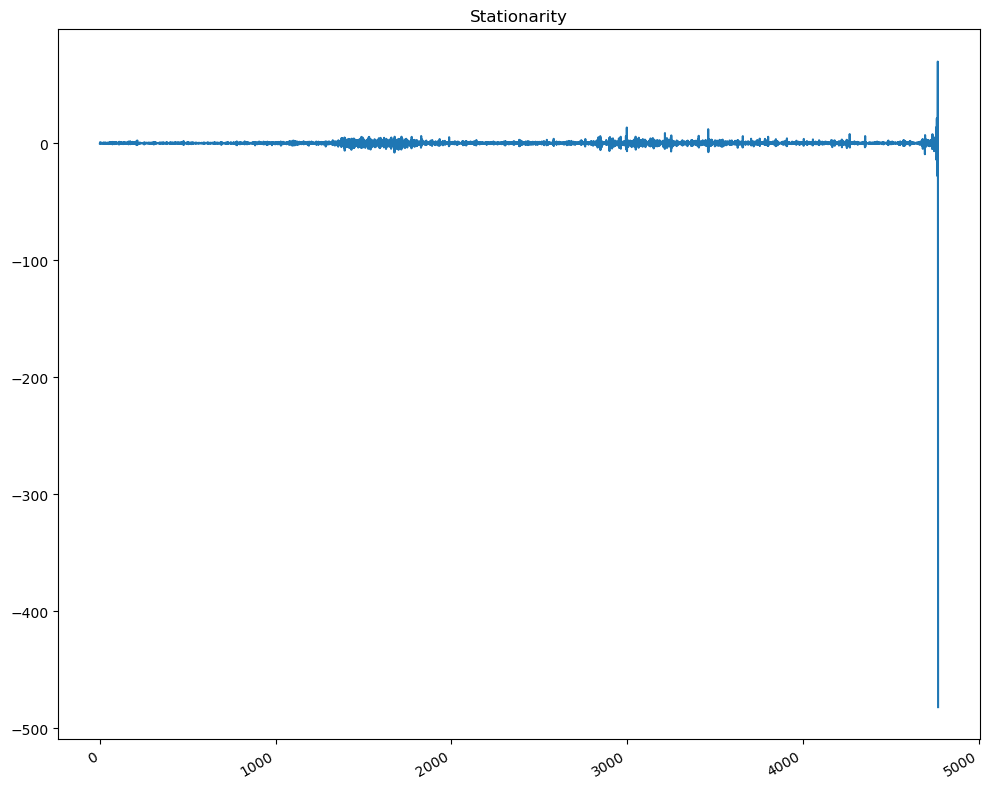

In [35]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data_diff)
ax.set_title('Stationarity')
fig.autofmt_xdate()
pt.tight_layout()

Third-Order integration. It appears that the sudden spike in the stock market on 28th of January 2021 affected the time series's variance at the end

<function plot_acf at 0x00000265BA9F4860>


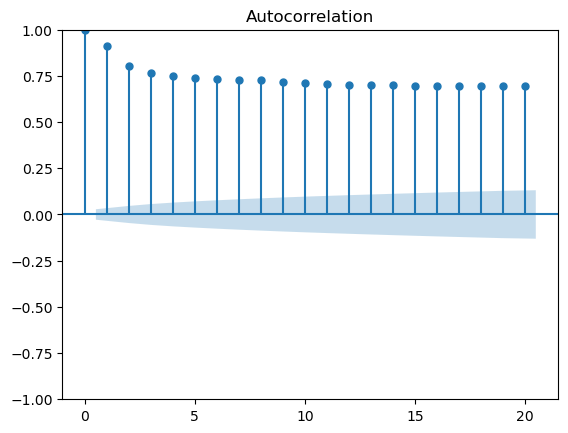

In [36]:
plot_acf(data['adjclose_price'], lags=20)
print(plot_acf)

<function plot_pacf at 0x00000265BA9F4720>


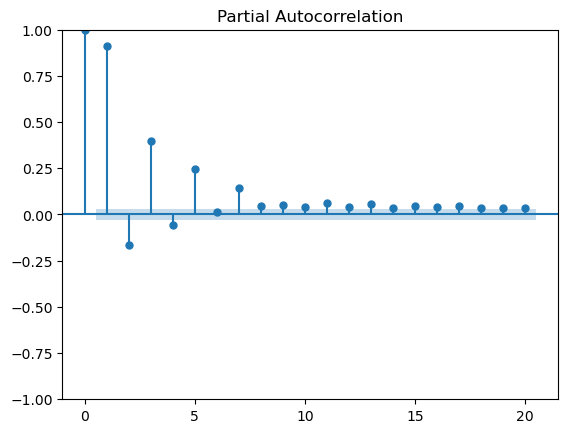

In [37]:
plot_pacf(data['adjclose_price'], lags=20)
print(plot_pacf)

# Data Preprocessing

In [37]:
copy_data = data.copy()

In [38]:
copy_data.head()

,open_price,high_price,low_price,close_price,volume,adjclose_price,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100),Daily Return
date,,,,,,,,,,,
2002-02-13,9.625,10.060,9.525,10.050,19054000.0,6.766666,NaN,NaN,NaN,NaN,NaN
2002-02-14,10.175,10.195,9.925,10.000,2755400.0,6.733003,NaN,NaN,NaN,NaN,-0.004975
2002-02-15,10.000,10.025,9.850,9.950,2097400.0,6.699336,NaN,NaN,NaN,NaN,-0.005000
2002-02-19,9.900,9.900,9.375,9.550,1852600.0,6.430017,NaN,NaN,NaN,NaN,-0.040201
2002-02-20,9.600,9.875,9.525,9.875,1723200.0,6.648838,NaN,NaN,NaN,NaN,0.034031


In [39]:
copy_data.drop(['open_price', 
           'high_price', 
           'close_price',
            'volume',
           'Moving Average (10)', 
           'Moving Average (30)', 
           'Moving Average (50)', 
           'Moving Average (100)', 
           'Daily Return'], axis=1)

,low_price,adjclose_price
date,,
2002-02-13,9.525000,6.766666
2002-02-14,9.925000,6.733003
2002-02-15,9.850000,6.699336
2002-02-19,9.375000,6.430017
2002-02-20,9.525000,6.648838
...,...,...
2021-01-22,42.320000,65.010002
2021-01-25,61.130001,76.790001
2021-01-26,80.199997,147.979996


In [40]:
scaler = StandardScaler()
scaler.fit(copy_data)
copy_data = scaler.transform(copy_data)

In [41]:
copy_data

array([[-9.23893159e-01, -8.41137203e-01, -9.67897212e-01, ...,
                    nan,             nan,             nan],
       [-8.86463780e-01, -8.32808295e-01, -9.38543177e-01, ...,
                    nan,             nan, -1.50743205e-01],
       [-8.98373137e-01, -8.43296611e-01, -9.44047036e-01, ...,
                    nan,             nan, -1.51339153e-01],
       ...,
       [ 4.44790115e+00,  7.79259342e+00,  4.21858625e+00, ...,
         7.18904199e-01,  1.77200790e-02,  2.15630938e+01],
       [ 2.25684770e+01,  2.19826610e+01,  1.66059716e+01, ...,
         1.44941685e+00,  3.91108305e-01,  3.13777088e+01],
       [ 1.64552417e+01,  2.83373434e+01,  6.57057517e+00, ...,
         1.84594550e+00,  5.95252109e-01, -1.03528943e+01]])

In [42]:
imputer = SimpleImputer(strategy='mean')
copy_data = imputer.fit_transform(copy_data)

In [43]:
copy_data

array([[-9.23893159e-01, -8.41137203e-01, -9.67897212e-01, ...,
         1.44394798e-16,  3.64848645e-16,  0.00000000e+00],
       [-8.86463780e-01, -8.32808295e-01, -9.38543177e-01, ...,
         1.44394798e-16,  3.64848645e-16, -1.50743205e-01],
       [-8.98373137e-01, -8.43296611e-01, -9.44047036e-01, ...,
         1.44394798e-16,  3.64848645e-16, -1.51339153e-01],
       ...,
       [ 4.44790115e+00,  7.79259342e+00,  4.21858625e+00, ...,
         7.18904199e-01,  1.77200790e-02,  2.15630938e+01],
       [ 2.25684770e+01,  2.19826610e+01,  1.66059716e+01, ...,
         1.44941685e+00,  3.91108305e-01,  3.13777088e+01],
       [ 1.64552417e+01,  2.83373434e+01,  6.57057517e+00, ...,
         1.84594550e+00,  5.95252109e-01, -1.03528943e+01]])

In [44]:
pca = PCA(n_components=1)
copy_data = pca.fit_transform(copy_data)

In [45]:
copy_data

array([[-1.40399335],
       [-1.51869564],
       [-1.53557811],
       ...,
       [16.6645365 ],
       [43.98287829],
       [31.39056979]])

# Model Selection

In [47]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:
    results = []  # Initialize an empty list to store results
    for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.
        try:
            # Fit an ARIMA(p,d,q) model using the SARIMAX function.
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
            aic = model.aic  # Calculate the model AIC
            results.append([order, aic])
        except Exception as e:
            print(f"Error fitting SARIMAX with order {order}: {e}")
            continue

    if not results:
        print("No models were successfully fitted.")
        return pd.DataFrame()  # Return an empty DataFrame if no models were fitted

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    # Sorting the results in ascending order. The lower the AIC, the better.
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [47]:
from itertools import product

ps = range(0,10,1)
qs = range(0,10,1)
d = 3

arima_list = list(product(ps,qs))

In [48]:
train = copy_data[:-262]
test = copy_data[-262:]

In [49]:
train.shape

(4511, 1)

In [50]:
test.shape

(262, 1)

In [51]:
results = optimize_ARIMA(train, arima_list, d)
results

C:\Users\Drew\AppData\Local\Temp\ipykernel_31080\1285813300.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Ma

,"(p,q)",AIC
0,"(1, 9)",-8863.514905
1,"(1, 7)",-8860.897018
2,"(1, 4)",-8860.763166
3,"(2, 3)",-8860.617550
4,"(0, 9)",-8860.261441
...,...,...
95,"(0, 1)",-5632.614892
96,"(3, 0)",-5595.336370
97,"(2, 0)",-4668.205216
98,"(1, 0)",-3426.278275


Best model is ARIMA(2,3,3). Since ARIMA(1,3,9) and ARIMA(2,3,3) has very similar AIC value, just a slight difference, The ARIMA(2,1,2) is chosen because it is less complex due to the smaller parameters (order of AR and MA). 

In the context of negative number, a value closer to zero is consider larger. Thus, moving from a more negative number to a less negative number is considered ascending. Hence, the larger the negative value away from 0, the smaller the AIC.

# Residual Analysis

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


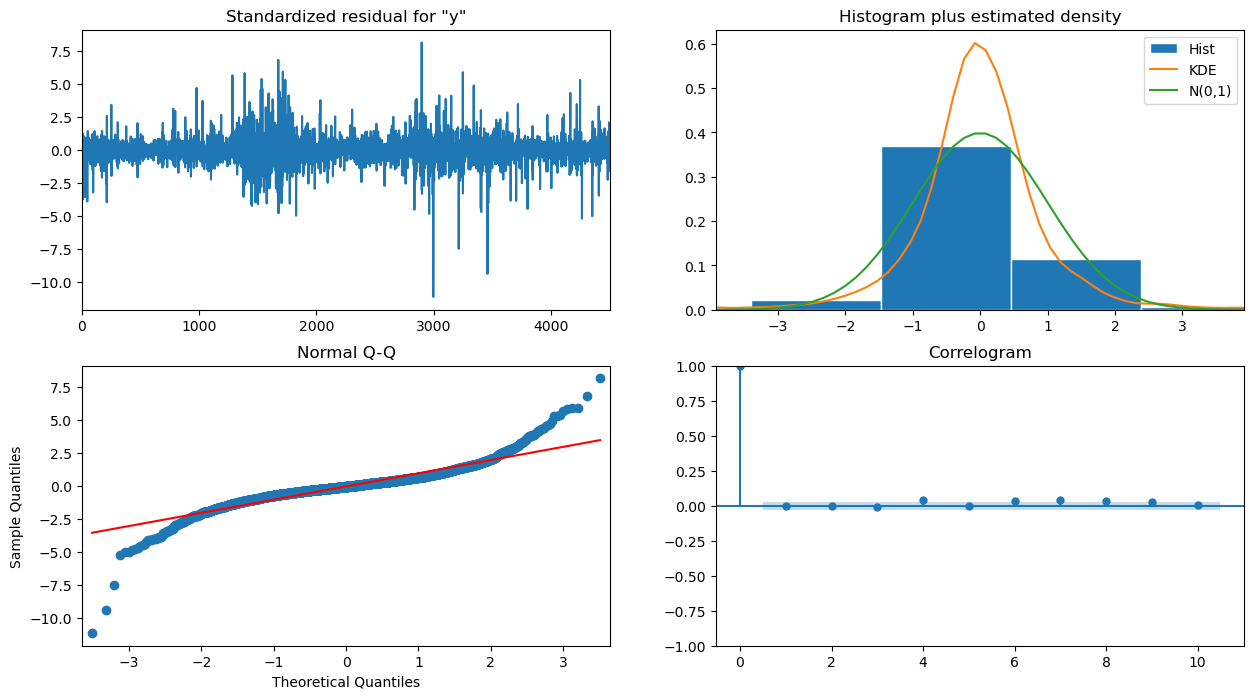

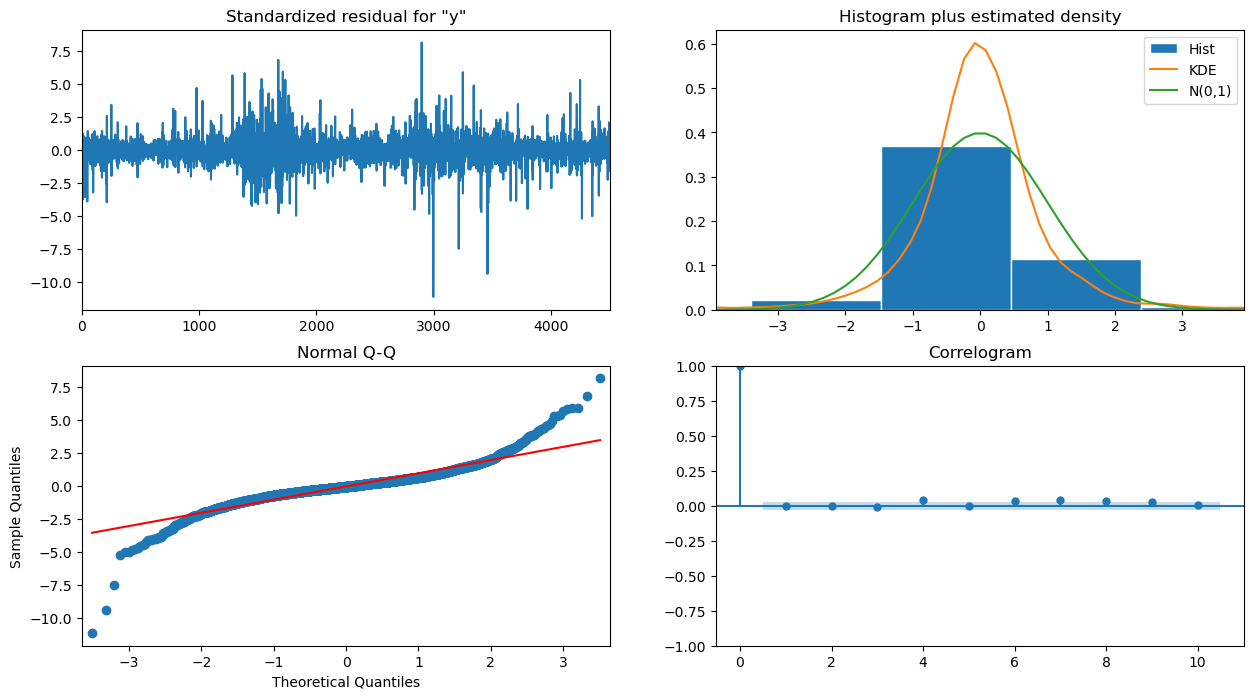

In [52]:
arima_model = SARIMAX(train, order=(2,3,3), simple_differencing=False)
arima_model = arima_model.fit(disp=False)
arima_model.plot_diagnostics(figsize=(15,8))

In [53]:
residuals = arima_model.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,20,1))
print(pvalue)

      lb_stat  lb_pvalue
1    9.981455   0.001581
2   10.040166   0.006604
3   10.040166   0.018228
4   14.321738   0.006336
5   14.332722   0.013628
6   18.707705   0.004687
7   24.074146   0.001106
8   25.534035   0.001261
9   34.280946   0.000080
10  34.357364   0.000161
11  36.095599   0.000163
12  37.696900   0.000172
13  41.170347   0.000089
14  43.611674   0.000068
15  43.928380   0.000113
16  44.676992   0.000156
17  45.145910   0.000232
18  45.148353   0.000394
19  45.322817   0.000618


It appears our acorr_ljungbox test doesn't look too good. Let's proceed with the forecasting anyway to see how it goes.

# Forecasting

In [56]:
def rolling_forecast(data: pd.Series, train_len: int, horizon: int, window: int, method: str) -> list:
    total_len = train_len + horizon
    predictions = []

    for i in range(train_len, total_len, window):
        train_data = data[:i]
        
        if method == 'mean':
            mean_val = np.mean(train_data.values)
            predictions.extend([mean_val] * window)
        
        elif method == 'ARIMA':
            model = SARIMAX(train_data, order=(2, 3, 3))
            res = model.fit(disp=False)
            forecast = res.get_forecast(steps=window)
            pred_mean = forecast.predicted_mean
            predictions.extend(pred_mean)
        
        if len(predictions) >= horizon:
            break

    return predictions[:horizon]

In [55]:
copy_data

array([[-1.40399335],
       [-1.51869564],
       [-1.53557811],
       ...,
       [16.6645365 ],
       [43.98287829],
       [31.39056979]])

# Predicting the next year stock prices of Gamestop Stock - From 2020-1-28 to 2021-1-28

In [56]:
TRAIN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_arima = rolling_forecast(copy_data, TRAIN, HORIZON, WINDOW, 'ARIMA')

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Ma

In [57]:
predicted_data = pd.DataFrame({'Actual Data': data['adjclose_price'][-262:]})
predicted_data.head()

,Actual Data
date,
2020-01-15,4.61
2020-01-16,4.62
2020-01-17,4.75
2020-01-21,4.59
2020-01-22,4.56


In [58]:
predicted_data['Predicted Data'] = pred_arima
predicted_data.head()

,Actual Data,Predicted Data
date,,
2020-01-15,4.61,-3.674382
2020-01-16,4.62,-3.676583
2020-01-17,4.75,-3.654673
2020-01-21,4.59,-3.655750
2020-01-22,4.56,-3.701833


In [59]:
pred_arima = np.array(pred_arima)
pred_arima = pred_arima.reshape(-1,1)

In [60]:
pred_arima = np.dot(pred_arima, pca.components_)
pred_arima = scaler.inverse_transform(pred_arima)

In [61]:
pred_arima

array([[ 4.89404831e+00,  4.22195470e+00,  5.60978035e+00, ...,
         5.70542900e+00,  6.31701771e+00, -4.75767600e-03],
       [ 4.88308011e+00,  4.21028872e+00,  5.59953257e+00, ...,
         5.69880500e+00,  6.31072183e+00, -4.76142258e-03],
       [ 4.99224132e+00,  4.32639470e+00,  5.70152391e+00, ...,
         5.76473048e+00,  6.37338173e+00, -4.72413461e-03],
       ...,
       [ 6.26703671e+01,  6.56739727e+01,  5.95912648e+01, ...,
         4.05981482e+01,  3.94813466e+01,  1.49779242e-02],
       [ 1.22506981e+02,  1.29317360e+02,  1.15497721e+02, ...,
         7.67351363e+01,  7.38283103e+01,  3.54172929e-02],
       [ 1.38904214e+02,  1.46757777e+02,  1.30817960e+02, ...,
         8.66378799e+01,  8.32405273e+01,  4.10183637e-02]])

In [62]:
predicted_data['Predicted Data'] = pred_arima

In [63]:
predicted_data.head(20)

,Actual Data,Predicted Data
date,,
2020-01-15,4.61,4.894048
2020-01-16,4.62,4.883080
2020-01-17,4.75,4.992241
2020-01-21,4.59,4.986879
2020-01-22,4.56,4.757275
2020-01-23,4.62,4.746176
2020-01-24,4.32,4.782078
2020-01-27,4.28,4.773256
2020-01-28,4.21,4.410869


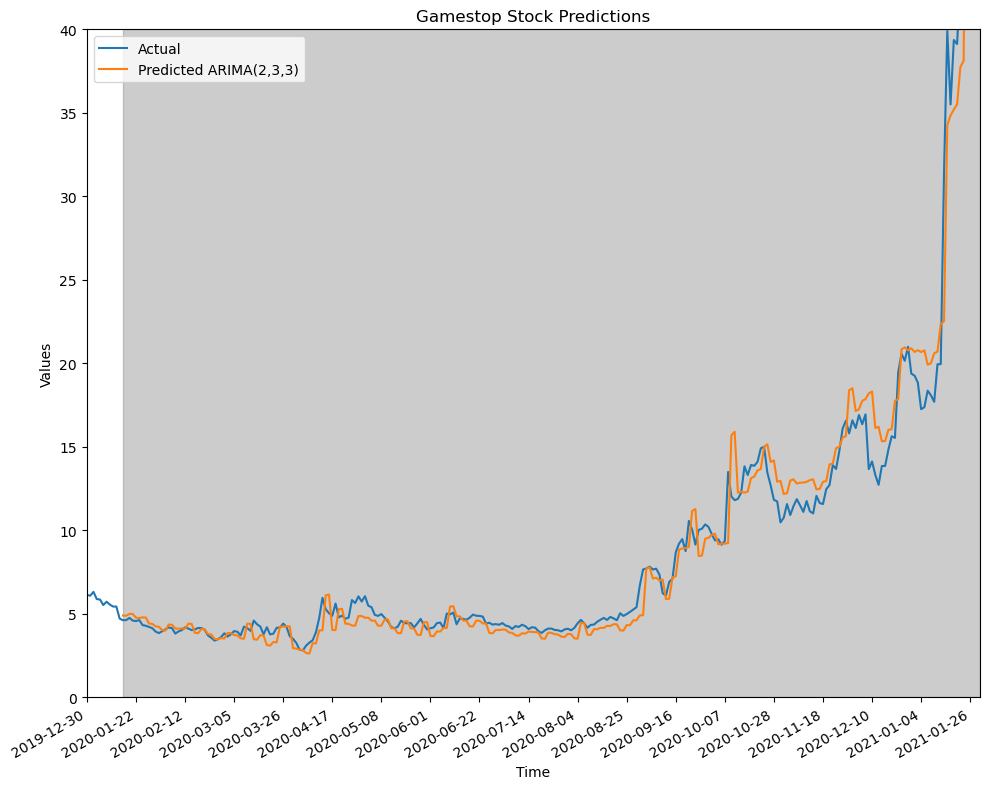

In [64]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['adjclose_price'], label='Actual')
ax.plot(predicted_data['Predicted Data'], label='Predicted ARIMA(2,3,3)')
ax.set_title('Gamestop Stock Predictions')
ax.set_xlabel('Time')
ax.set_ylabel('Values')
ax.legend(loc=2)
ax.set_xlim(4500, 4773)
ax.set_ylim(0,40)
ax.axvspan(4511, 4773, color="#808080", alpha=0.4)
pt.xticks(np.arange(4500, 4773,15))
fig.autofmt_xdate()
pt.tight_layout()

In [65]:
mse = mean_squared_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 238.06693256296248


In [66]:
mae = mean_absolute_error(predicted_data['Actual Data'], predicted_data['Predicted Data'])
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2.3996177256600824


In [67]:
var = predicted_data['Predicted Data'].std()**2
print(f' Variance: {var}')

 Variance: 181.300909987781


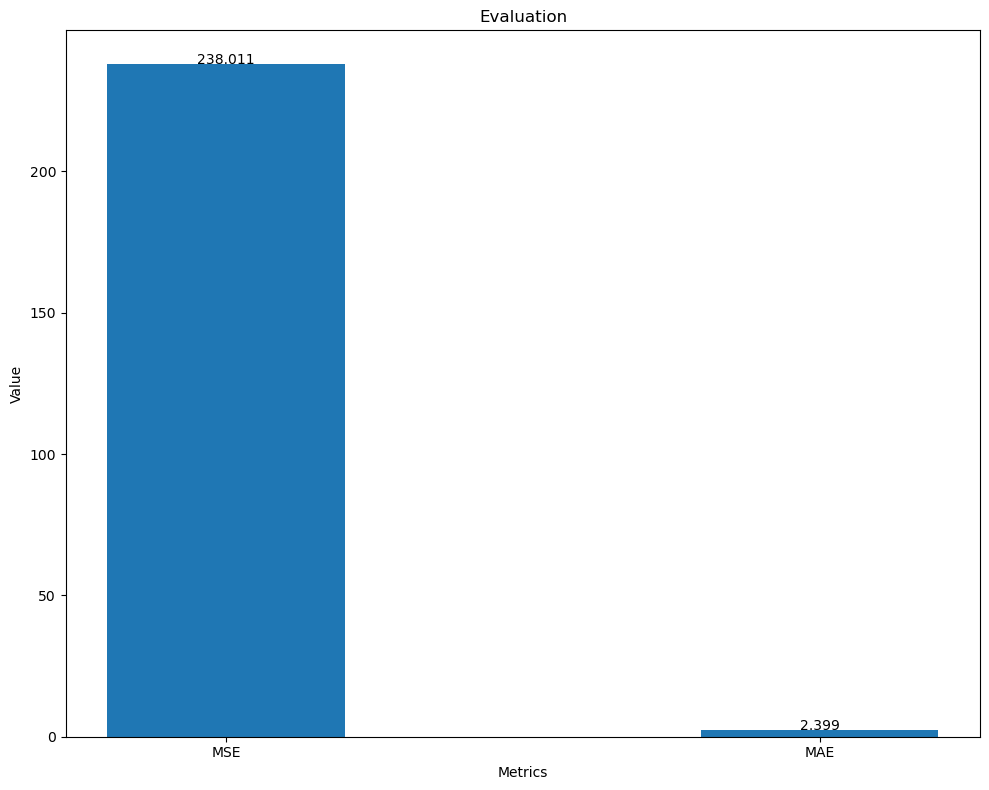

In [68]:
fig, ax = pt.subplots(figsize=(10,8))

X = ['MSE', 'MAE']
y = [238.011, 2.399]

ax.bar(X,y, width=0.4)
ax.set_title('Evaluation')
ax.set_xlabel('Metrics')
ax.set_ylabel('Value')

for index, value in enumerate(y):
    pt.text(x=index, y=value + 0.1, s=str(value), ha='center')

pt.tight_layout()

The performance of the model seems fairly good. The model is able to fit the data very well without overfitting and its able to capture the pattern except at the end for the sudden increase of the stock. The MSE is so high, higher than the variance might be due to the model is not able to predict the sudden increase of that day. Hence, MSE is high. To further prove this uncertainty, I will remove that sudden increase and train the model again. One more thing to point out is that it has a low variance compared to other windows of rolling_forecast whereas it means that this window yields stable and consistent predictions.

In [38]:
new_data = data.copy()

In [39]:
new_data.tail()

,open_price,high_price,low_price,close_price,volume,adjclose_price,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100),Daily Return
date,,,,,,,,,,,
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,35.091000,22.937333,19.3438,14.8823,0.510807
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,41.001000,25.041667,20.6576,15.5834,0.181203
2021-01-26,88.559998,150.000000,80.199997,147.979996,178588000.0,147.979996,53.805000,29.503667,23.3822,16.9867,0.927074
2021-01-27,354.829987,380.000000,249.000000,347.510010,93396700.0,347.510010,86.561001,40.643667,30.1098,20.3847,1.348358
2021-01-28,265.000000,483.000000,112.250000,193.600006,58815800.0,193.600006,102.781001,46.673000,33.7616,22.2425,-0.442894


In [40]:
new_data.drop(['2021-01-27'])

,open_price,high_price,low_price,close_price,volume,adjclose_price,Moving Average (10),Moving Average (30),Moving Average (50),Moving Average (100),Daily Return
date,,,,,,,,,,,
2002-02-13,9.625000,10.060000,9.525000,10.050000,19054000.0,6.766666,NaN,NaN,NaN,NaN,NaN
2002-02-14,10.175000,10.195000,9.925000,10.000000,2755400.0,6.733003,NaN,NaN,NaN,NaN,-0.004975
2002-02-15,10.000000,10.025000,9.850000,9.950000,2097400.0,6.699336,NaN,NaN,NaN,NaN,-0.005000
2002-02-19,9.900000,9.900000,9.375000,9.550000,1852600.0,6.430017,NaN,NaN,NaN,NaN,-0.040201
2002-02-20,9.600000,9.875000,9.525000,9.875000,1723200.0,6.648838,NaN,NaN,NaN,NaN,0.034031
...,...,...,...,...,...,...,...,...,...,...,...
2021-01-21,39.230000,44.750000,37.000000,43.029999,57079800.0,43.029999,30.398000,21.335000,18.2734,14.2861,0.099949
2021-01-22,42.590000,76.760002,42.320000,65.010002,196784300.0,65.010002,35.091000,22.937333,19.3438,14.8823,0.510807
2021-01-25,96.730003,159.179993,61.130001,76.790001,177874000.0,76.790001,41.001000,25.041667,20.6576,15.5834,0.181203


In [ ]:
fig, ax = pt.subplots(figsize=(15,8))

ax.plot(new_data['adjclose_price'], label='Adj Close')
ax.set_title('Adjusted Close Price of Gamestop')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
fig.autofmt_xdate()
pt.xticks(np.arange(0,4772,500))
pt.tight_layout()

In [41]:
new_data.drop([
           'open_price', 
           'high_price', 
           'close_price',
           'volume',
           'Moving Average (10)', 
           'Moving Average (30)', 
           'Moving Average (50)', 
           'Moving Average (100)', 
           'Daily Return'], axis=1)

,low_price,adjclose_price
date,,
2002-02-13,9.525000,6.766666
2002-02-14,9.925000,6.733003
2002-02-15,9.850000,6.699336
2002-02-19,9.375000,6.430017
2002-02-20,9.525000,6.648838
...,...,...
2021-01-22,42.320000,65.010002
2021-01-25,61.130001,76.790001
2021-01-26,80.199997,147.979996


In [42]:
scaler = StandardScaler()
scaler.fit(new_data)
new_data = scaler.transform(new_data)

In [43]:
imputer = SimpleImputer(strategy='mean')
new_data = imputer.fit_transform(new_data)

In [44]:
pca = PCA(n_components=1)
new_data = pca.fit_transform(new_data)

In [45]:
new_data

array([[-1.40399335],
       [-1.51869564],
       [-1.53557811],
       ...,
       [16.6645365 ],
       [43.98287829],
       [31.39056979]])

In [46]:
train = new_data[:-261]
test = new_data[-261:]

In [48]:
from itertools import product

ps = range(0,10,1)
qs = range(0,10,1)
d = 3

arima_list = list(product(ps,qs))

In [49]:
results = optimize_ARIMA(train, arima_list, d)
results

C:\Users\Drew\AppData\Local\Temp\ipykernel_8400\1285813300.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):  # Iterate over each unique (p,q) combination. Tqdm_notebook will display a progress bar.


  0%|          | 0/100 [00:00<?, ?it/s]

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Ma

,"(p,q)",AIC
0,"(1, 9)",-8863.784067
1,"(1, 7)",-8863.671532
2,"(2, 3)",-8863.553785
3,"(1, 5)",-8860.476410
4,"(8, 5)",-8860.220532
...,...,...
95,"(0, 1)",-5633.264011
96,"(3, 0)",-5596.109135
97,"(2, 0)",-4669.675893
98,"(1, 0)",-3426.654145


I will pick ARIMA(2,3,3) as the champion model again here.

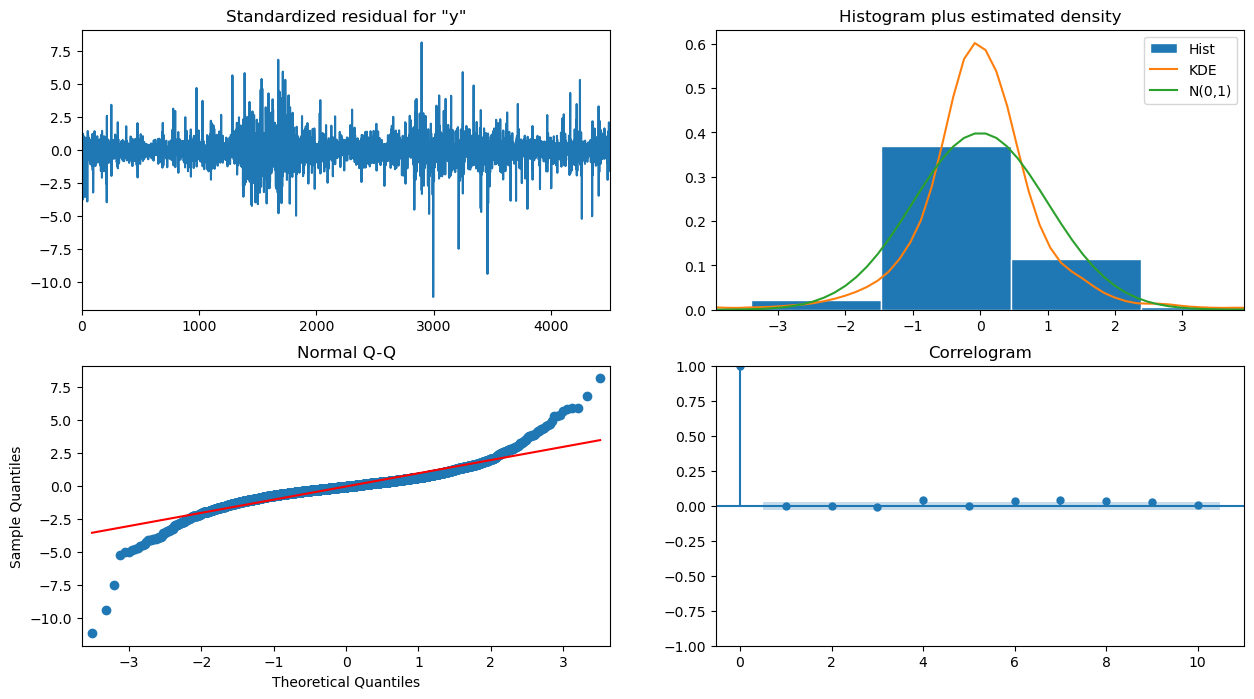

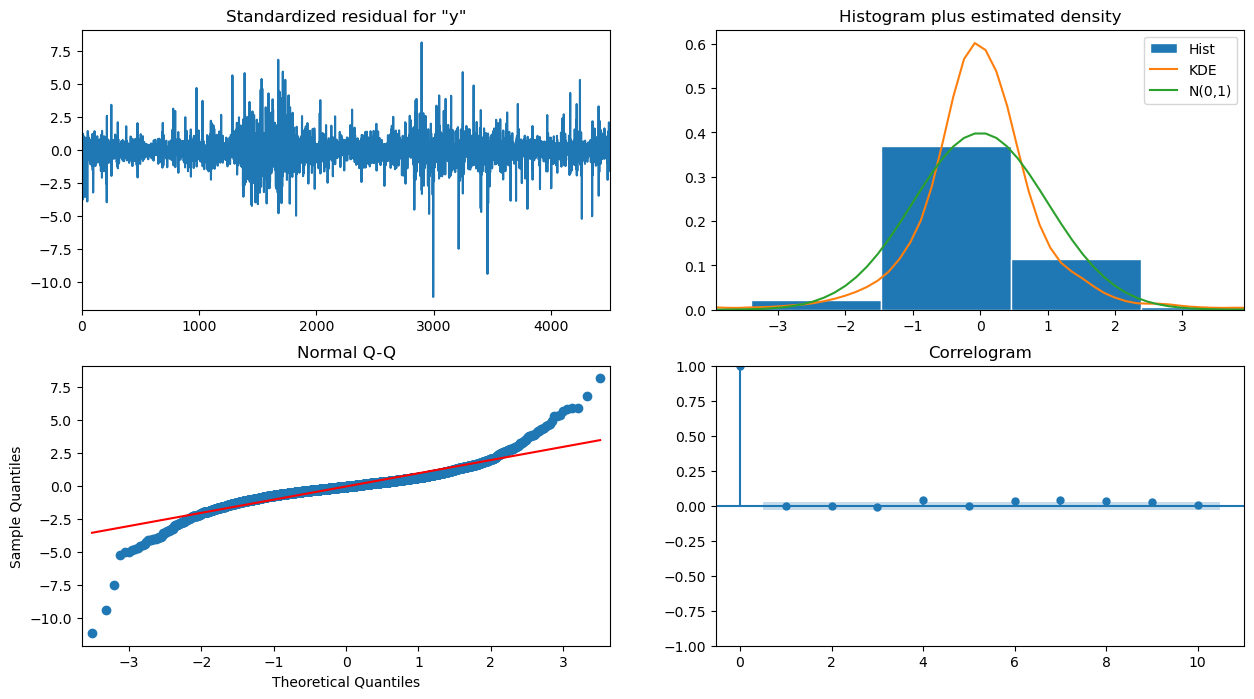

In [55]:
arima_model = SARIMAX(train,order=(2,3,3), simple_differencing=False)
arima_model = arima_model.fit(disp=False)
arima_model.plot_diagnostics(figsize=(15,8))

In [57]:
residuals = arima_model.resid
pvalue = acorr_ljungbox(residuals, np.arange(1,20,1))
print(pvalue)

      lb_stat  lb_pvalue
1   10.080510   0.001498
2   10.140006   0.006282
3   10.140028   0.017413
4   14.401318   0.006118
5   14.412605   0.013190
6   18.770186   0.004570
7   24.122164   0.001084
8   25.565286   0.001246
9   34.303224   0.000079
10  34.377815   0.000159
11  36.131536   0.000161
12  37.744891   0.000169
13  41.208457   0.000088
14  43.659174   0.000067
15  43.982536   0.000111
16  44.728965   0.000153
17  45.204159   0.000227
18  45.206842   0.000387
19  45.382758   0.000606


It seems the residuals are still the same as previous. So let's just still proceed with the forecasting

In [81]:
TRAIN = len(train)
HORIZON = len(test)
WINDOW = 2

pred_arima = rolling_forecast(new_data, TRAIN, HORIZON, WINDOW, 'ARIMA')

C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Drew\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Ma

In [82]:
new_predicted_data = pd.DataFrame({'Actual Data': data['adjclose_price'][-261:]})
new_predicted_data.head()

,Actual Data
date,
2020-01-16,4.62
2020-01-17,4.75
2020-01-21,4.59
2020-01-22,4.56
2020-01-23,4.62


In [83]:
new_predicted_data.tail()

,Actual Data
date,
2021-01-22,65.010002
2021-01-25,76.790001
2021-01-26,147.979996
2021-01-27,347.510010
2021-01-28,193.600006


In [84]:
new_predicted_data.drop(['2021-01-27'])

,Actual Data
date,
2020-01-16,4.620000
2020-01-17,4.750000
2020-01-21,4.590000
2020-01-22,4.560000
2020-01-23,4.620000
...,...
2021-01-21,43.029999
2021-01-22,65.010002
2021-01-25,76.790001


In [85]:
new_predicted_data['Predicted Data'] = pred_arima
new_predicted_data.head()

,Actual Data,Predicted Data
date,,
2020-01-16,4.62,-3.657585
2020-01-17,4.75,-3.654803
2020-01-21,4.59,-3.628926
2020-01-22,4.56,-3.701853
2020-01-23,4.62,-3.701460


In [86]:
pred_arima = np.array(pred_arima)
pred_arima = pred_arima.reshape(-1,1)

In [87]:
pred_arima = np.dot(pred_arima, pca.components_)
pred_arima = scaler.inverse_transform(pred_arima)

In [88]:
pred_arima

array([[ 4.97773436e+00,  4.31096482e+00,  5.68796978e+00, ...,
         5.75596932e+00,  6.36505455e+00, -4.72908999e-03],
       [ 4.99159722e+00,  4.32570962e+00,  5.70092211e+00, ...,
         5.76434149e+00,  6.37301201e+00, -4.72435462e-03],
       [ 5.12052379e+00,  4.46283843e+00,  5.82138059e+00, ...,
         5.84220381e+00,  6.44701747e+00, -4.68031507e-03],
       ...,
       [ 8.55295829e+01,  8.99874799e+01,  8.09490534e+01, ...,
         5.44034617e+01,  5.26028220e+01,  2.27863197e-02],
       [ 1.22463298e+02,  1.29270898e+02,  1.15456907e+02, ...,
         7.67087550e+01,  7.38032357e+01,  3.54023714e-02],
       [ 3.70462426e+02,  3.93047602e+02,  3.47167085e+02, ...,
         2.26482297e+02,  2.16157834e+02,  1.20115482e-01]])

In [89]:
new_predicted_data['Predicted Data'] = pred_arima
new_predicted_data.head()

,Actual Data,Predicted Data
date,,
2020-01-16,4.62,4.977734
2020-01-17,4.75,4.991597
2020-01-21,4.59,5.120524
2020-01-22,4.56,4.757180
2020-01-23,4.62,4.759134


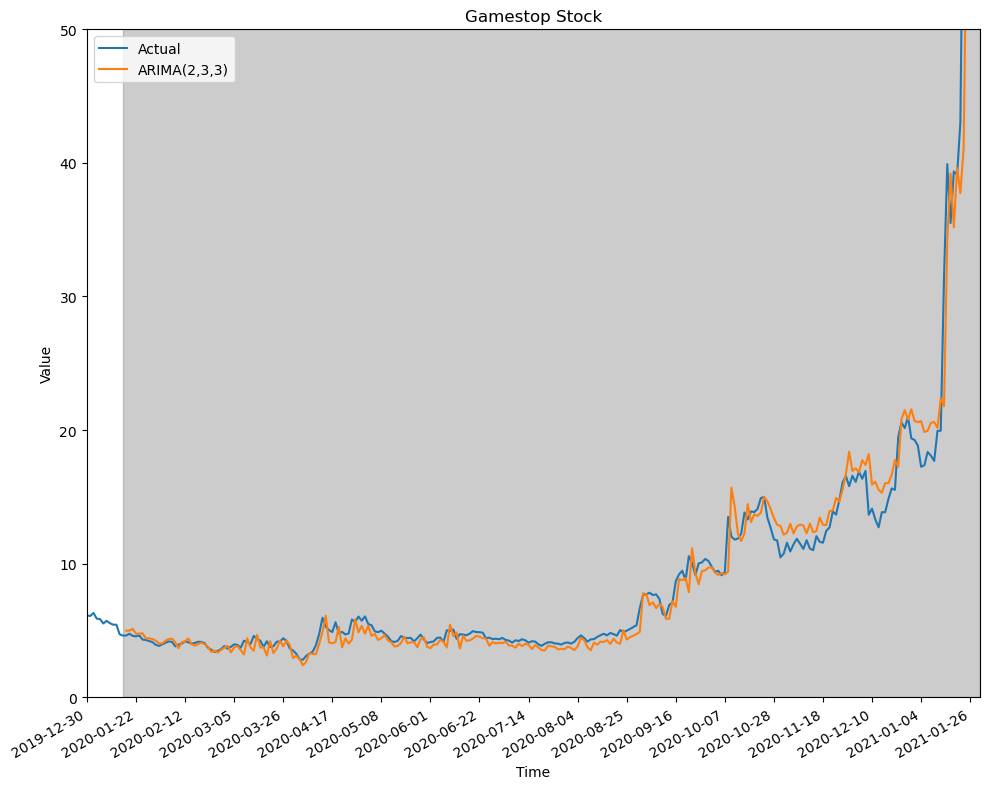

In [94]:
fig, ax = pt.subplots(figsize=(10,8))

ax.plot(data['adjclose_price'], label='Actual')
ax.plot(new_predicted_data['Predicted Data'], label='ARIMA(2,3,3)')
ax.set_title('Gamestop Stock')
ax.set_xlabel('Time')
ax.set_ylabel('Value')
ax.legend(loc=2)
ax.set_xlim(4500, 4773)
ax.set_ylim(0,50)
ax.axvspan(4511,4773, color='#808080', alpha=0.4)
pt.xticks(np.arange(4500, 4773, 15))
fig.autofmt_xdate()
pt.tight_layout()

In [91]:
mse = mean_squared_error(new_predicted_data['Actual Data'], new_predicted_data['Predicted Data'])
print(f' Mean Squared Error: {mse}')

 Mean Squared Error: 333.7772251491738


In [92]:
mae = mean_absolute_error(new_predicted_data['Actual Data'], new_predicted_data['Predicted Data'])
print(f' Mean Absolute Error: {mae}')

 Mean Absolute Error: 2.7194341586239914


In [93]:
var = new_predicted_data['Predicted Data'].std()**2
print(f' Variance: {var}')

 Variance: 630.8262211836543


As a result, it seems that removing that particular sudden increase of price does not improve the forecast.